### 次元削減とは
次元削減とは、データが持っている情報をなるべく損ねずにデータを圧縮するタスク  
回帰式の場合、  
$y = a_0 + a_1x_1 + a_2x_2$ → $y = a_0 + a_1x_1$  
この形にしても予測、分類に支障が無ければ、次元削減とはに成功している  
  
具体的な例として次を考える  
  
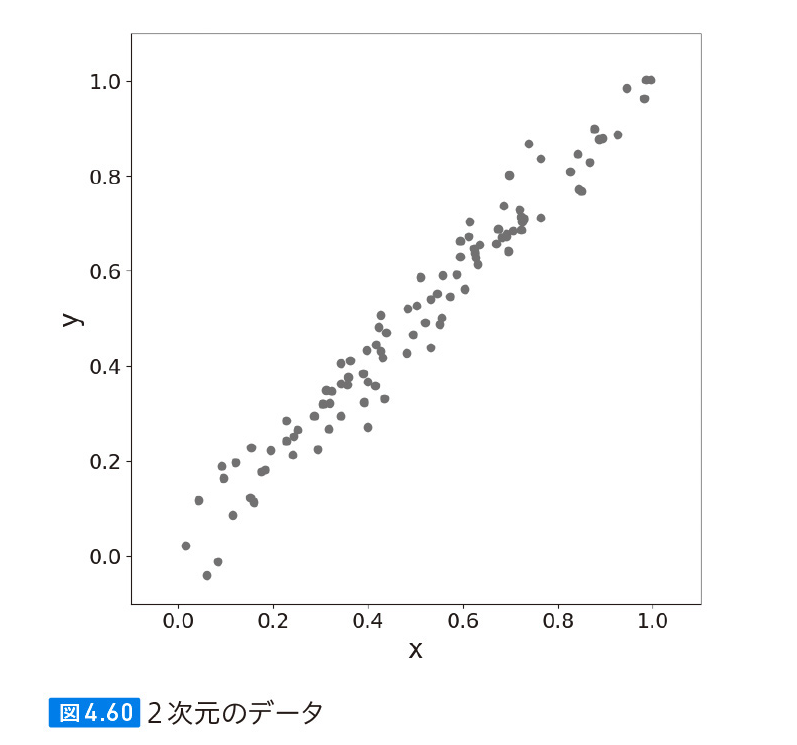  
この散布図は大体$y=x$の形をとっている  
即ち2次元のデータ  
  
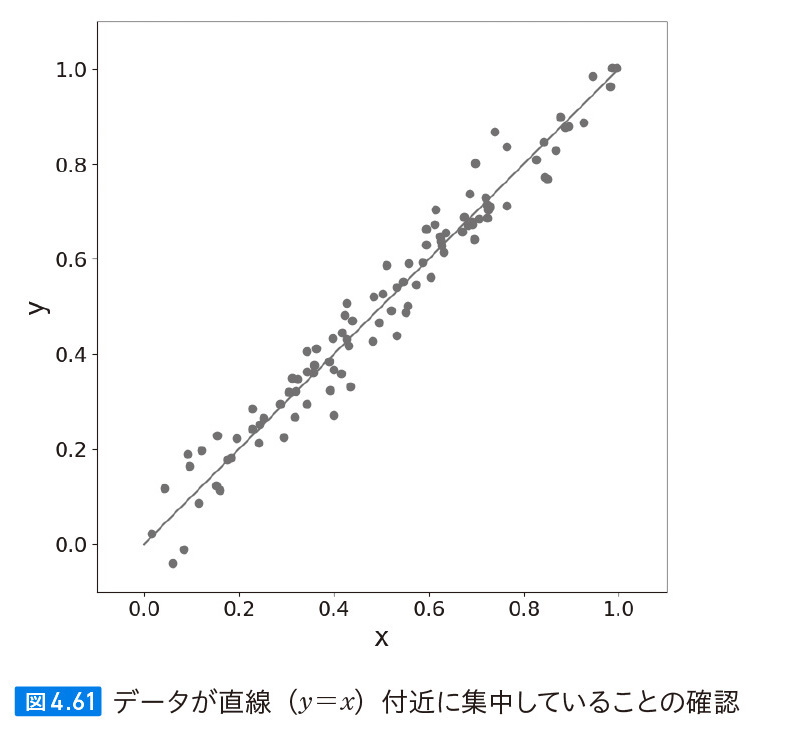  
直線を引くとこうなる  
多少のばらつきはあるが、この直線一本でこれらのプロットを大体表すことが出来る
  
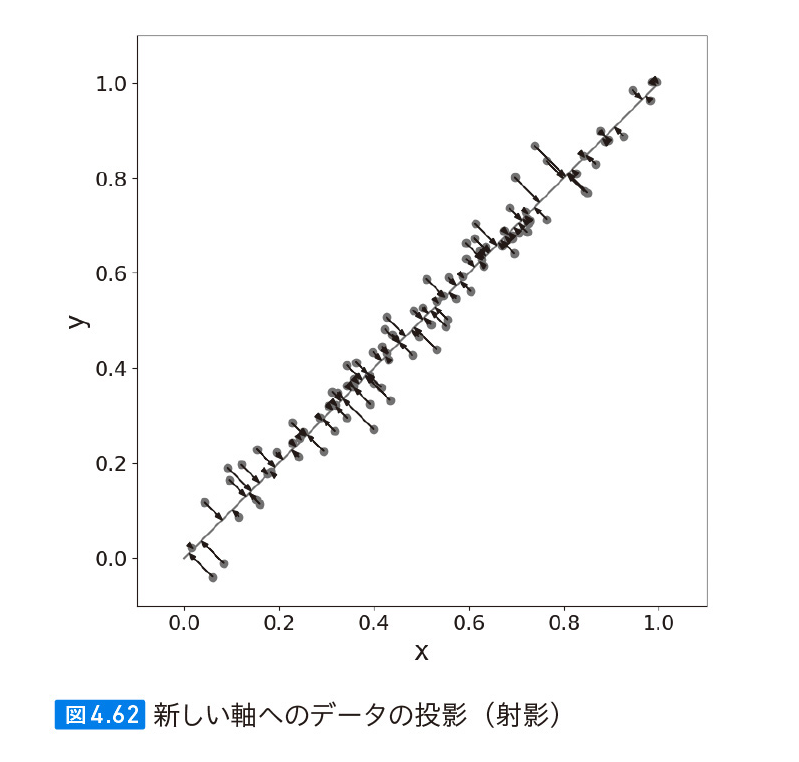  
そしたら、**この直線を新しい軸であると考える**  
つまり、この軸に対して、各プロットを射影する(軸に対して垂直な線を各点から降ろす)  
  
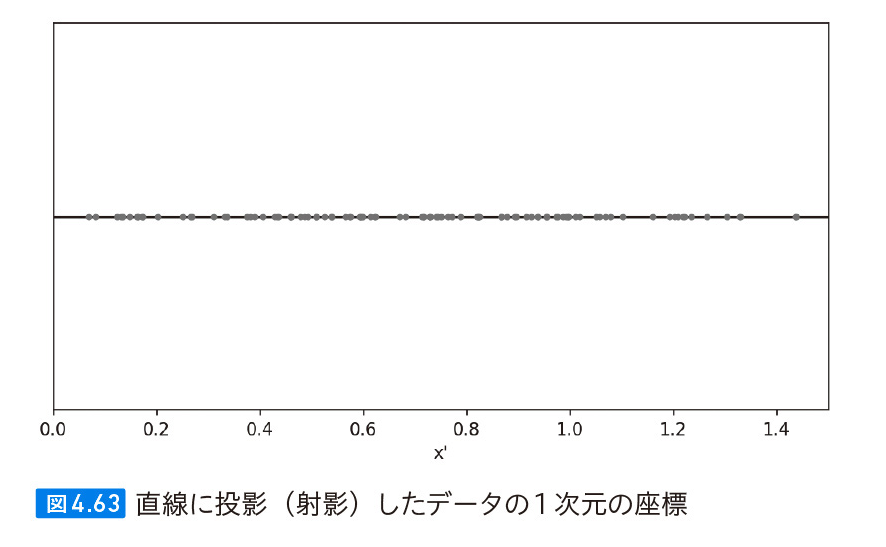  
すると、x'軸一本でこれらのプロットを表せるようになる  
この場合1次元の削除に成功している  
  
x'に対する、疎密度を表すグラフになった


### 主成分分析
主成分分析(principal component analysis, PCA)は、高次元のデータに対して分散が大きくなる方向(データが散らばっている方向)を探して、元の次元以下にデータを変換する手法  
  
簡単な例として2次元のデータを主成分分析にかけて、次元削減する

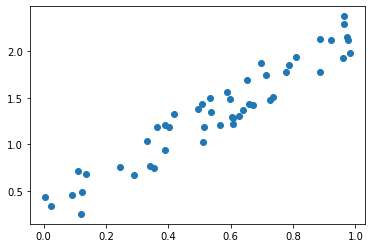

In [1]:
import numpy
import matplotlib.pyplot as pyplot

x = numpy.random.random(size=50)
y = 2*x + 0.5*numpy.random.rand(50)

canvas,sub_plots = pyplot.subplots()
sub_plots.scatter(x,y)
pyplot.show()

scikit-learnのPCAクラスを用いる事で次元削減ができる  
今回の場合、x,yで$50\times 2$行列に対し次元削減を行う  
  
まずは、PCAによって、上記の散布図を2変数に変換する  
この時点では、次元削減にはなっていないが、どういう動きをするのかを注目する

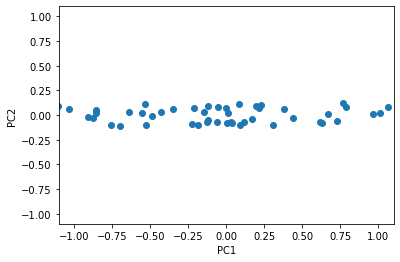

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# pcaに渡すnumpy配列は、行がデータサンプル、列が次元を表す  
# 50行、2列となる
x_pca = pca.fit_transform(numpy.hstack((x[:,numpy.newaxis],y[:,numpy.newaxis])))

canvas,sub_plots = pyplot.subplots()
sub_plots.scatter(x_pca[:,0],x_pca[:,1])
sub_plots.set_xlabel("PC1")
sub_plots.set_ylabel("PC2")
sub_plots.set_xlim(-1.1,1.1)
sub_plots.set_ylim(-1.1,1.1)
pyplot.show()

元のデータは、y軸が取り得る値の範囲が広く、分散していた  
今回PCAを掛ける事で、PC2成分は0付近に納まっているのに対して、  
PC1成分は1~-1と広く分布していることが分かる  
  
つまり、PC2成分は全て0で表してしまえば、PC1軸のみでこのデータを表すことが出来る  
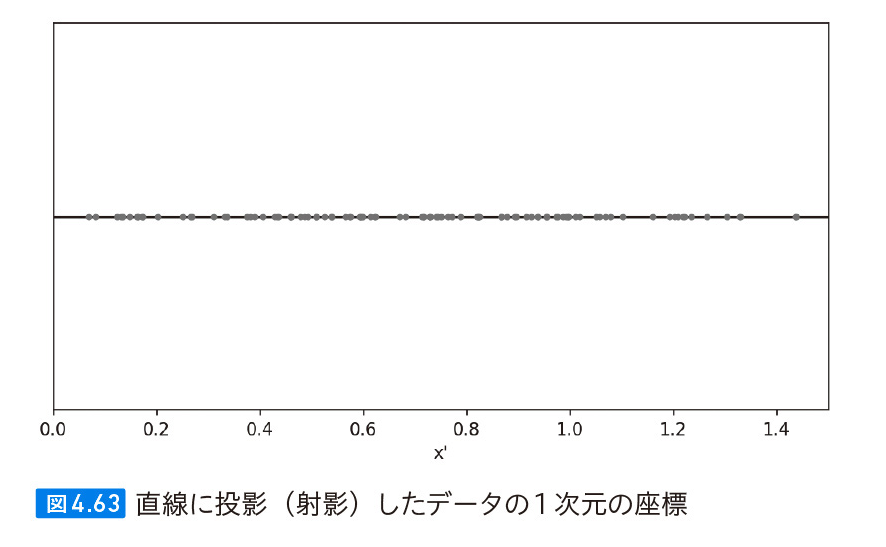  
これと同じことが、できる